## Chap 1: Classification and Regression Trees

### Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE


In [2]:
wbc = pd.read_csv('./datasets/wbc.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
wbc = wbc.drop(columns = 'Unnamed: 32')

In [4]:
wbc.shape

(569, 32)

In [5]:
wbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
wbc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
#fetch categorical columns
cat_feature_masks = wbc.dtypes==object
cat_columns = wbc.columns[cat_feature_masks].tolist()
cat_columns

['diagnosis']

In [8]:
#encode diagnosis column
le = LabelEncoder()
wbc[cat_columns]= wbc[cat_columns].apply(lambda col: le.fit_transform(col))
wbc[cat_columns].head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


### Part 1: Classification and Regression Trees
Predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

#### Decision Tree Classification

In [9]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']

In [10]:
#split training and testing data 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)

#instantiate model
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

#fit model
dt.fit(X_train,y_train)

#predict test labels
y_pred = dt.predict(X_test)
print(y_pred[:5])

[0 0 0 1 0]


In [11]:
#Evaluate Performance
acc = accuracy_score(y_test,y_pred)
print('Test accuracy score: {:.2f}'. format(acc))

Test accuracy score: 0.89


In [12]:
#Logistic regression vs classification tree

#Get the helper function
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

#### Decision Regions

Classification model divides the feature space into regions where all instances are assigned to one class label.  Decision boundaries separate the surfaces in the decision regions



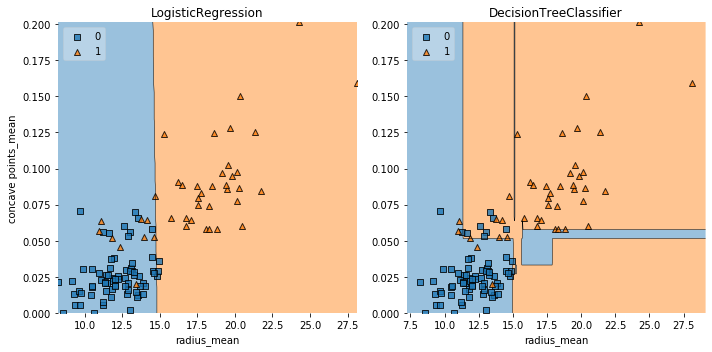

In [13]:
#instantiate model
logreg = LogisticRegression(random_state=1)

#fit model
logreg.fit(X_train, y_train)

## Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

#Review the decisions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)


Criteria measures the impurity of a node. Types of criteria: 
    <ul>
    <li>Gini index</li>
    <li>Entropy</li>
   </ul>
#### Using entropy as a criterion


In [14]:
# Use all 30 features
X = wbc.loc[:, ~wbc.columns.isin(['id','diagnosis'])]
y = wbc['diagnosis']

In [15]:
#split train and test data 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

#instantiate model
dt_entropy = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy', random_state = 1)

#fit model
dt_entropy.fit(X_train, y_train)

#predict test labels
y_pred = dt_entropy.predict(X_test)
    
#Evaluate accuracy
entropy_acc = accuracy_score(y_test, y_pred)

print('Test accuracy score for Entropy: {:.2f}'. format(entropy_acc))

Test accuracy score for Entropy: 0.93


In [16]:
#instantiate model
dt_gini = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy', random_state = 1)

#fit model
dt_entropy.fit(X_train, y_train)

#predict test labels
y_pred = dt_entropy.predict(X_test)
    
#Evaluate accuracy
entropy_acc = accuracy_score(y_test, y_pred)

print('Test accuracy score for Entropy: {:.2f}'. format(entropy_acc))

Test accuracy score for Entropy: 0.93


In [17]:
auto = pd.read_csv('./datasets/auto.csv')

auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [18]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
origin    392 non-null object
size      392 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [19]:
origin = auto.iloc[:,5:6]
#instantiate encoder
ohe = OneHotEncoder()

origin=ohe.fit_transform(origin).toarray()
origin = pd.DataFrame(origin)
origin.columns = ['Asia', 'Europe',  'US']
origin[:5]

,Asia,Europe,US
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [20]:
auto_X = auto.loc[:, ~auto.columns.isin(['mpg', 'origin'])]
auto_y = auto['mpg']

X_final = pd.concat([auto_X, origin], axis=1) 
X_final.head()

,displ,hp,weight,accel,size,Asia,Europe,US
0,250.0,88,3139,14.5,15.0,0.0,0.0,1.0
1,304.0,193,4732,18.5,20.0,0.0,0.0,1.0
2,91.0,60,1800,16.4,10.0,1.0,0.0,0.0
3,250.0,98,3525,19.0,15.0,0.0,0.0,1.0
4,97.0,78,2188,15.8,10.0,0.0,1.0,0.0


In [21]:
#split data into train and test
X_train, X_test,y_train,y_test = train_test_split(X_final, auto_y, test_size=0.2, random_state=3)

#instantiate model
dtr = DecisionTreeRegressor(max_depth = 8, #number of nodes
                            min_samples_leaf=0.13, #each node should contain atleast 13% of the training data
                            random_state=3)
#fit model
dtr.fit(X_train, y_train)

#predict test labels
y_pred_dtr = dtr.predict(X_test)

#Evaluate model using root mean squared error
mse = MSE(y_test, y_pred_dtr)

rmse = mse**(1/2)

print('Test accuracy score : {:.2f}'. format(rmse))

Test accuracy score : 4.37


In [22]:
# instantiate model
lr = LinearRegression()

#fit model
lr.fit(X_train, y_train)

#predict
y_pred_lr = lr.predict(X_test)

lr_mse = MSE(y_test, y_pred_lr)

lr_rmse = lr_mse ** (1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(lr_rmse))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse))


Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37
